In [1]:
from scipy.io import loadmat
import os

In [2]:
data_left = loadmat(os.path.join('..\Tmaze_Data\\252-1375\\2018-01-07_15-14-54\\04_tmaze1', 'Spike_Data_Umap_Left.mat'))

In [3]:
data_left = data_left['Spike_Data_Umap_Left'].squeeze()

In [4]:
data_right = loadmat(os.path.join('..\Tmaze_Data\\252-1375\\2018-01-07_15-14-54\\04_tmaze1', 'Spike_Data_Umap_Right.mat'))

In [5]:
data_right = data_right['Spike_Data_Umap_Right'].squeeze()

In [12]:
import pickle as pkl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

%matplotlib widget

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


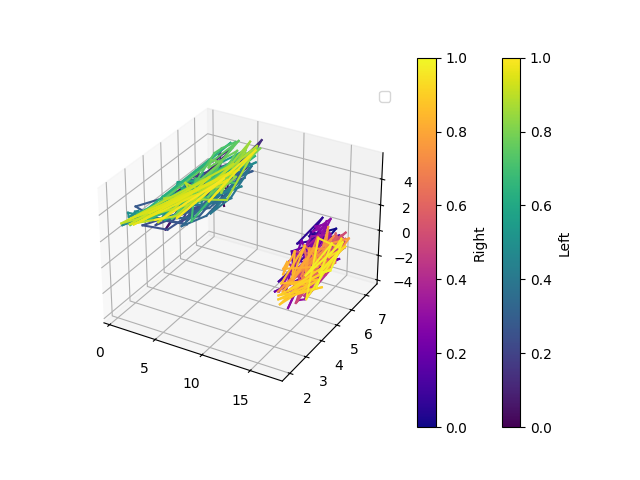

In [21]:
%matplotlib widget

ax = plt.figure().add_subplot(projection='3d')

#for s in data:
   # ax.plot(s[:, 0], s[:, 1], s[:, 2])

hue = np.linspace(0, 1, len(data_left[0]))

# Create a colormap
colormap1 = cm.viridis
colormap2 = cm.plasma

# Normalize the hue variable to match the colormap's range
norm = Normalize(vmin=min(hue), vmax=max(hue))

for i in range(len(data_left[0])-1):
   ax.plot(data_left[0][i:i+2, 0], data_left[0][i:i+2, 1], data_left[0][i:i+2, 2], color=colormap1(norm(hue[i])))
   ax.plot(data_right[0][i:i+2, 0], data_right[0][i:i+2, 1], data_right[0][i:i+2, 2], color=colormap2(norm(hue[i])))

mappable = cm.ScalarMappable(norm=norm, cmap=colormap1)
mappable.set_array(hue)
plt.colorbar(mappable, label='Left', ax=ax)

mappable = cm.ScalarMappable(norm=norm, cmap=colormap2)
mappable.set_array(hue)
plt.colorbar(mappable, label='Right', ax=ax)

plt.show()